In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime, os


In [2]:
df_files = os.listdir('../../data/DataGithub/')
df_files

['AntoineAugusti_Vacances_19902026.csv',
 'AntoineAugusti_Vacances_Table_19902026.csv',
 'AntoineAugusti_Vacances_Table_19902026_nonCorrigé.csv',
 'code_etablissement.csv',
 'Effectifs_ecoles.csv',
 'fetes_chretiennes.csv',
 'fetes_juives.csv',
 'fetes_musulmanes.csv',
 'frequentation_cantines_v3.csv',
 'incidence RDD 3.csv',
 'incidence RDD 6.csv',
 'incidence RDD 7.csv',
 'Journees_de_greve.csv',
 'jours-feries-seuls.csv',
 'key_jours.xlsx',
 'Liste ETS_geo_AE12102020.xlsx',
 'menus_2011-2015.csv',
 'menus_2016-2019.csv',
 'missing_strikes.xlsx',
 'mouvements-sociaux-depuis-2002.csv',
 'mouvements-sociaux-depuis-2002.json',
 'orga_des_etablissements.xlsx',
 'ramadan.csv',
 'vacances_Nantes_2011-2019.csv']

In [3]:
df = pd.read_csv('244400404_effectifs-eleves-cleaned')
df['datetime']= df['Date'].apply( lambda string1 :datetime.datetime.strptime(string1,"%Y-%m-%d"))
df['joursem']= df['datetime'].apply( lambda string1 :string1.weekday())
df['isoweek']= df['datetime'].apply( lambda string1 :string1.isocalendar().week)
df.head()

,RowNo,Type de site,Date,Prévision,Réel,Nom du site,An,RéelMed,RéelNorm,datetime,joursem,isoweek
0,0,M/E,2011-09-06,290.0,271.0,LEDRU ROLLIN/SARAH BERNHARDT,2011,308.0,0.879870,2011-09-06,1,36
1,1,M/E,2011-09-05,95.0,102.0,BEAUJOIRE,2011,129.0,0.790698,2011-09-05,0,36
2,2,M/E,2011-09-05,167.0,171.0,CONTRIE,2011,211.0,0.810427,2011-09-05,0,36
3,3,M,2011-09-05,80.0,64.0,COUDRAY M.,2011,77.0,0.831169,2011-09-05,0,36
4,4,M,2011-09-05,73.0,77.0,FONTENY,2011,92.0,0.836957,2011-09-05,0,36


In [4]:
df_calend=pd.read_csv('../../data/DataGithub/jours-feries-seuls.csv')
df_calend['datetime']= df_calend['date'].apply( lambda string1 :datetime.datetime.strptime(string1,"%Y-%m-%d"))
df_calend=df_calend[(df_calend['datetime'].apply(lambda date1 : date1.year)).isin(range(2011,2023))]
df_calend['joursem']= df_calend['datetime'].apply( lambda string1 :string1.weekday())
df_calend=df_calend[df_calend['joursem'].isin([1,3])]
df_calend.head()

,date,est_jour_ferie,nom_jour_ferie,datetime,joursem
671,2011-06-02,True,Ascension,2011-06-02,3
673,2011-07-14,True,Fête Nationale,2011-07-14,3
675,2011-11-01,True,Toussaint,2011-11-01,1
680,2012-05-01,True,Fête du travail,2012-05-01,1
681,2012-05-08,True,Victoire des alliés,2012-05-08,1


In [27]:
df_calend.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 0 to 77
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  39 non-null     datetime64[ns]
 1   pont      39 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 936.0+ bytes


In [5]:
df_checkdate=pd.merge(df_calend, df, how='inner', on='datetime')
df_checkdate.head(30)

,date,est_jour_ferie,nom_jour_ferie,datetime,joursem_x,RowNo,Type de site,Date,Prévision,Réel,Nom du site,An,RéelMed,RéelNorm,joursem_y,isoweek


In [6]:
df_calend['datetime_plus1']=df_calend['datetime'].apply(lambda date1 : date1 + datetime.timedelta(days=1))
df_calend['datetime_minus1']=df_calend['datetime'].apply(lambda date1 : date1 - datetime.timedelta(days=1))
df_calend.head()


,date,est_jour_ferie,nom_jour_ferie,datetime,joursem,datetime_plus1,datetime_minus1
671,2011-06-02,True,Ascension,2011-06-02,3,2011-06-03,2011-06-01
673,2011-07-14,True,Fête Nationale,2011-07-14,3,2011-07-15,2011-07-13
675,2011-11-01,True,Toussaint,2011-11-01,1,2011-11-02,2011-10-31
680,2012-05-01,True,Fête du travail,2012-05-01,1,2012-05-02,2012-04-30
681,2012-05-08,True,Victoire des alliés,2012-05-08,1,2012-05-09,2012-05-07


In [7]:
df_calend=df_calend.melt(id_vars=['datetime','nom_jour_ferie'], value_vars=['datetime_plus1', 'datetime_minus1'],
               var_name='décalage', value_name='datetime2')

In [8]:
df_calend=df_calend[['datetime2','nom_jour_ferie']]
df_calend.rename(columns={'datetime2':'datetime', 'nom_jour_ferie':'pont'},inplace=True)
df_calend['joursem']= df_calend['datetime'].apply( lambda string1 :string1.weekday())
df_calend=df_calend[df_calend['joursem'].isin([0,4])]
df_calend=df_calend[['datetime','pont']]
df_calend.head()

,datetime,pont
0,2011-06-03,Ascension
1,2011-07-15,Fête Nationale
5,2012-05-18,Ascension
6,2012-11-02,Toussaint
9,2013-05-10,Ascension


In [9]:
df=pd.merge(df, df_calend, how='left', on='datetime')

In [10]:
df['pont'].fillna('', inplace=True)
df.head()

,RowNo,Type de site,Date,Prévision,Réel,Nom du site,An,RéelMed,RéelNorm,datetime,joursem,isoweek,pont
0,0,M/E,2011-09-06,290.0,271.0,LEDRU ROLLIN/SARAH BERNHARDT,2011,308.0,0.879870,2011-09-06,1,36,
1,1,M/E,2011-09-05,95.0,102.0,BEAUJOIRE,2011,129.0,0.790698,2011-09-05,0,36,
2,2,M/E,2011-09-05,167.0,171.0,CONTRIE,2011,211.0,0.810427,2011-09-05,0,36,
3,3,M,2011-09-05,80.0,64.0,COUDRAY M.,2011,77.0,0.831169,2011-09-05,0,36,
4,4,M,2011-09-05,73.0,77.0,FONTENY,2011,92.0,0.836957,2011-09-05,0,36,


<AxesSubplot:xlabel='pont'>

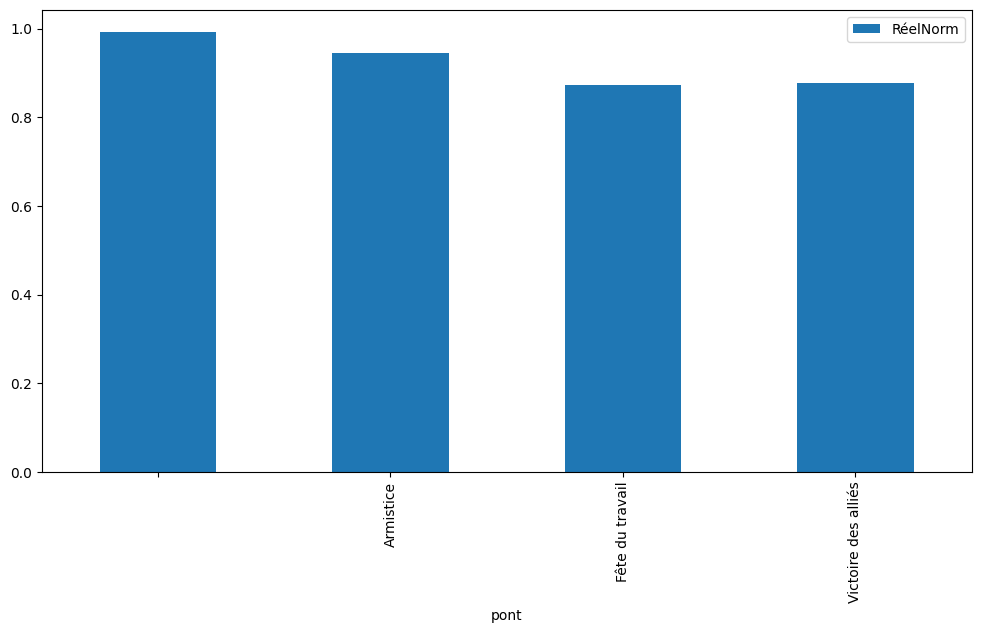

In [11]:
df[['pont','RéelNorm']].groupby('pont').mean().plot(kind='bar', figsize=(12,6))

In [12]:
df[['pont','RéelNorm']].groupby('pont').mean()


,RéelNorm
pont,
,0.992613
Armistice,0.945663
Fête du travail,0.874031
Victoire des alliés,0.878617


In [13]:
df[['pont','RéelNorm']].groupby('pont').median()

,RéelNorm
pont,
,1.000000
Armistice,0.920904
Fête du travail,0.853137
Victoire des alliés,0.866667


In [14]:
df[['pont','RéelNorm']].groupby('pont').count()

,RéelNorm
pont,
,126823
Armistice,169
Fête du travail,88
Victoire des alliés,89


In [15]:
df[df['pont']=='Armistice']['joursem'].value_counts()

0    88
4    81
Name: joursem, dtype: int64

In [16]:
df[df['pont']=='Armistice']['datetime'].value_counts()

2014-11-10    88
2021-11-12    81
Name: datetime, dtype: int64

In [17]:
df[df['pont']=='Victoire des alliés']['joursem'].value_counts()

0    89
Name: joursem, dtype: int64

In [18]:
df[df['pont']=='Victoire des alliés']['datetime'].value_counts()

2012-05-07    89
Name: datetime, dtype: int64

In [19]:
df[df['pont']=='Fête du travail']['joursem'].value_counts()

0    88
Name: joursem, dtype: int64

In [20]:
df[df['pont']=='Fête du travail']['datetime'].value_counts()

2012-04-30    88
Name: datetime, dtype: int64

In [21]:
df[df['pont']!='']['datetime'].value_counts()

2012-05-07    89
2012-04-30    88
2014-11-10    88
2021-11-12    81
Name: datetime, dtype: int64

Pour 4 dates de ponts sur 10 ans le bénéfice du feature pont semble faible.
On est tout de même un peu surpris du faible nombre de ponts sur une dizaine d'années.

Sur le calendrier le mercredi 9 mai 2018 est coincé entre 2 jours fériés et paraissait être un cas intéressant.
En fait les cantines ne fonctionnent que trés peu mes mercredis.

In [29]:
df[df['datetime']>datetime.datetime.strptime('2018-01-01',"%Y-%m-%d")]['joursem'].value_counts()

1    12222
4    12192
0    12132
3    11669
2        1
Name: joursem, dtype: int64

In [30]:
df[((df['datetime']>datetime.datetime.strptime('2016-01-01',"%Y-%m-%d"))&(df['joursem']==2))]

,RowNo,Type de site,Date,Prévision,Réel,Nom du site,An,RéelMed,RéelNorm,datetime,joursem,isoweek,pont
49741,51068,M,2020-03-25,0.0,25.0,JOSEPH BLANCHART,2020,89.0,0.280899,2020-03-25,2,13,


In [31]:
df[((df['joursem']==2))]['datetime'].value_counts()

2011-06-01    88
2013-05-22    88
2013-04-03    88
2012-05-16    88
2014-06-11    88
2015-05-13    88
2014-05-28    87
2014-04-23    87
2020-03-25     1
Name: datetime, dtype: int64

In [ ]:
df[((df['joursem']==2))]['RéelNorm'].describe()

count    703.000000
mean       0.861896
std        0.167372
min        0.278146
25%        0.779243
50%        0.862069
75%        0.928570
max        1.617391
Name: RéelNorm, dtype: float64